In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd

DATA_DIR = "./data/"
WEB = "https://www.worldometers.info/coronavirus/"

# COVID-19 expansion tracking and Mathematical Model.

### 0. Introduction and motivation

SARS-CoV-2 is a virus belonging to the coronaviruses family that was first detected in Hubei province, Mainland China, in December 2019 and triggered an ongoing global pandemia.
Because of the high $R_0$ (estimated between 2 and 3) and the asymptomatic nature of the incubation period, it's necessary to develop mathematical models for prediction, that will prevent further consecuencies by anticipating expansion rate.

### 1. Preliminary analysis

This section is intended to act like a toolbox providing access to resources and data management functions, visualization tools will also be provided.

In [32]:
columns = ["Country/Region","Confirmed","Deaths","Recovered"]
data_files = sorted(os.listdir(DATA_DIR))


def timeEvolution(country):
    """
    Returns a pandas DataFrame with information of a country (Confirmed,Deaths,Recovered) by day
    since the beginig of the outbreak.
    
    params:
    
        -country (String): target country
    
    returns:
        -Pandas DataFrame if information is available , else None.
    """
    dic = []
    for file in data_files:
        key = file.split("_")[0]
        df = pd.read_csv(DATA_DIR + file)
        indexes = df["Country/Region"] == country #rows associated with country
        if any(indexes):
            country_data = df[df["Country/Region"] == country][columns].sum() #all records of that country
            dic.append([key]+list(country_data[columns[1:]]))
        else: #no rows
            dic.append([key,0,0,0])
    
    df = pd.DataFrame(dic)
    df.columns = columns
    return df
        
def worldTimeEvolution(): #about 20s
    """
    Returns a dictionary indexed by country of DataFrames with information about countries since outbreak
    
    returns:
        -dictionatry of pandas DataFrames
    """
    dic = {}
    countries = pd.read_csv(DATA_DIR+data_files[-1])["Country/Region"].unique()
    for country in countries:
        dic[country] = timeEvolution(country)
    
    return dic



def graphProgression(countryDF,param): #TODO: x axis problem with dates, too messy
    """
    Graphs the progression in time of a given parameter regarding country info
    
    params:
        -countryDF (pandas.DataFrame): info about the country (see timeEvolution or worldTimeEvolution)
        -param (String): "Confirmed" -> confirmed cases of COVID-19 in country
                         "Deaths" -> deaths by COVID-19 in country
                         "Recovered" -> recovered patients in country 

    """
    plt.plot(range(len(countryDF)),list(countryDF[param]))
    plt.title("{} COVID-19".format(param))
    plt.show()

def realTimeEvolution():
    """
    Returns a Pandas DataFrame with infomration about the real time expansion of the virus.
    
    returns:
        -pandas Dataframe
    """
    cols = ["Country","Total Cases","New Cases","Total Deaths","New Deaths","Active Cases","Total Recovered","Critical"]
    page = requests.get(WEB)
    soup = BeautifulSoup(page.content, 'html.parser')
    countryTable = soup.find_all('tbody')[0]
    rows = countryTable.find_all("tr")
    data =[]
    for row in rows:
        info = row.find_all("td")
        data.append([data.text.strip() if data.text.strip() != "" else "-" for data in info])
    return pd.DataFrame(data,columns=cols)

def updateData(): #TODO
    "Stores today's evolution data in csv format"

In [30]:
country_info = worldTimeEvolution()


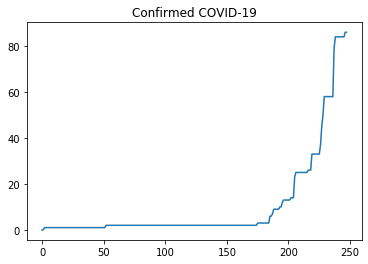

In [58]:
#country_info = worldTimeEvolution()    
#graphProgression(country_info["UK"],"Confirmed")
graphProgression(country_info['Spain'],'Confirmed')
#realTimeEvolution()